# CMT307 MLP DataPrep

####

# Import Libraries

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime, timezone, timedelta

# Supress warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#os.getcwd()

# Read & Combine Data

In [6]:
# File Paths (JupyterLab)

path1 = 'C:/Users/c23091913/Downloads/CMT307 Labs/ashrae_energy_prediction/Original data/train.csv'
path2 = 'C:/Users/c23091913/Downloads/CMT307 Labs/ashrae_energy_prediction/Original data/building_metadata.csv'
path3 = 'C:/Users/c23091913/Downloads/CMT307 Labs/ashrae_energy_prediction/Original data/weather_train.csv'

In [7]:
 # Reading Data
df = pd.read_csv(path1)
building_metadata = pd.read_csv(path2)
weather_df = pd.read_csv(path3)

In [8]:
# What are the shapes of the dataframes?
print(df.shape, building_metadata.shape, weather_df.shape)

(20216100, 4) (1449, 6) (139773, 9)


In [10]:
# Join training dataset and building metadata on building id
training_joined = df.merge(building_metadata, how='left', on='building_id')
print(f'Training joined shape: {training_joined.shape}')

# Join Training Joined and Weather by site id and timestamp
combined_df = training_joined.merge(weather_df, how='left', on=['site_id', 'timestamp'])
print(f'Final df shape: {combined_df.shape}')

Final df shape: (20216100, 16)


#####

Remove the column `Unnamed: 0`, if produced

In [14]:
# Make a copy of dataframes:
def remove_unnamed(df_):

    # In case 'Unamed:0' reappears, check and drop it:
    if 'Unnamed: 0' in df.columns:
        df_ = df_.drop('Unnamed: 0', axis=1)
        print("Dropped 'Unnamed: 0' from dataframe")
    
    elif 'Unnamed: 0' not in df_.columns:
        print("Column 'Unnamed: 0' not in dataframe")
        print(df_.columns)
    
    return df_

In [15]:
temp_df = remove_unnamed(combined_df)

Column 'Unnamed: 0' not in dataframe
Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')


#####

# Data Prep

In [15]:
# At a glance
temp_df.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Non-Null Count     Dtype   
---  ------              --------------     -----   
 0   building_id         20216100 non-null  int16   
 1   meter               20216100 non-null  int8    
 2   timestamp           20216100 non-null  category
 3   meter_reading       20216100 non-null  float32 
 4   site_id             20216100 non-null  int8    
 5   primary_use         20216100 non-null  category
 6   square_feet         20216100 non-null  int32   
 7   year_built          8088455 non-null   float16 
 8   floor_count         3506933 non-null   float16 
 9   air_temperature     20119442 non-null  float16 
 10  cloud_coverage      11390735 non-null  float16 
 11  dew_temperature     20115960 non-null  float16 
 12  precip_depth_1_hr   16467077 non-null  float16 
 13  sea_level_pressure  18984431 non-null  float16 
 14  wind_direction      18767052 non-null


#
The cell below may display `RuntimeWarnings`, but we just ignore them for now. Scroll down to see cell output

In [16]:
# Check Desrciptive Stats
temp_df.describe() # Lambda function to suppress scientific notation
#round(temp_df.describe(), 3)

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,20216100.00000,20216100.00000,20216100.00000,20216100.00000,20216100.00000,8088455.00000,3506933.00000,20119442.00000,11390735.00000,20115960.00000,16467077.00000,18984431.00000,18767052.00000,20072424.00000
mean,799.27800,0.66244,2117.12158,7.99223,107782.98133,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,426.91331,0.93099,153235.62500,5.09906,117142.44365,nan,0.00000,0.00000,0.00000,0.00000,nan,nan,nan,0.00000
min,0.00000,0.00000,0.00000,0.00000,283.00000,1900.00000,1.00000,-28.90625,0.00000,-35.00000,-1.00000,968.00000,0.00000,0.00000
25%,393.00000,0.00000,18.30000,3.00000,32527.00000,1951.00000,1.00000,8.60156,0.00000,0.00000,0.00000,1011.50000,70.00000,2.09961
50%,895.00000,0.00000,78.77500,9.00000,72709.00000,1969.00000,3.00000,16.70312,0.00000,8.89844,0.00000,1016.00000,180.00000,3.09961
75%,1179.00000,1.00000,267.98401,13.00000,139113.00000,1993.00000,6.00000,24.09375,4.00000,16.09375,0.00000,1020.50000,280.00000,4.60156
max,1448.00000,3.00000,21904700.00000,15.00000,875000.00000,2017.00000,26.00000,47.18750,9.00000,26.09375,343.00000,1046.00000,360.00000,19.00000


In [17]:
temp_df.head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [18]:
temp_df.tail(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
20216095,1444,0,2016-12-31 23:00:00,8.750000,15,Entertainment/public assembly,19619,1914.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216096,1445,0,2016-12-31 23:00:00,4.825000,15,Education,4298,NaN,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216097,1446,0,2016-12-31 23:00:00,0.000000,15,Entertainment/public assembly,11265,1997.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216098,1447,0,2016-12-31 23:00:00,159.574997,15,Lodging/residential,29775,2001.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216099,1448,0,2016-12-31 23:00:00,2.850000,15,Office,92271,2001.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875


In [19]:
# How many rows per site (as a % of total rows)
pct_sites = round(temp_df.groupby('site_id').size()/len(temp_df)*100, 2)
pct_sites

site_id
0      5.33
1      2.74
2     12.52
3     11.72
4      3.69
5      3.87
6      3.30
7      1.81
8      2.81
9     13.25
10     2.04
11     0.59
12     1.56
13    13.41
14    12.37
15     8.98
dtype: float64

##

The EDA found that `year_built` and `floor_count` have a high number of missing values, so these are dropped

> **NOTE 1:** On the units of consumption, they are all in `KWh`. However, Kaggle reported an error in the units for site 0 which still in its original units and will need to be convereted to `kWh`.

In [20]:
# Columns to drop
drop_col_list = ['year_built', 'floor_count', 'building_id']
temp_df.drop(columns = drop_col_list, inplace=True)

print(temp_df.columns)

Index(['meter', 'timestamp', 'meter_reading', 'site_id', 'primary_use',
       'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')


#


There was a reported error relating to the consumption units for the electric meters in site 0, these need to be converted to kWh

> Refs: https://www.kaggle.com/c/ashrae-energy-prediction/discussion/119261

In [21]:
# For the purpose of checking results, I'll subset consumption rows for electic meters in site 0 before conversion
subset = temp_df.loc[(temp_df['site_id'] == 0) & (temp_df['meter'] == 0), ['meter_reading']]

In [22]:
subset.describe()

,meter_reading
count,908409.000000
mean,226.534790
std,376.670319
min,0.000000
25%,0.000000
50%,70.440201
75%,296.571991
max,4521.000000


In [23]:
# Converting consumption of electric meter for site 0 to kWh
temp_df.loc[(temp_df['site_id'] == 0) & (temp_df['meter'] == 0), 'meter_reading'] = temp_df['meter_reading']*0.2931

In [24]:
# Check results:
temp_df.loc[(temp_df['site_id'] == 0) & (temp_df['meter'] == 0), 'meter_reading'].describe()

count    908409.000000
mean         66.397316
std         110.402069
min           0.000000
25%           0.000000
50%          20.646023
75%          86.925247
max        1325.105103
Name: meter_reading, dtype: float64

Doing a manual check for the median: 70.44 * 0.2931 = 20.62

#####
Descriptive stats from teh EDA show there are some meter readings equal to 0, so I will go ahead and remove them

In [25]:
# Subset to exclude rows with 0.0 meter reading
temp_df = temp_df[temp_df['meter_reading'] >= 1]

In [26]:
temp_df.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 18001908 entries, 45 to 20216099
Data columns (total 13 columns):
 #   Column              Non-Null Count     Dtype   
---  ------              --------------     -----   
 0   meter               18001908 non-null  int8    
 1   timestamp           18001908 non-null  category
 2   meter_reading       18001908 non-null  float32 
 3   site_id             18001908 non-null  int8    
 4   primary_use         18001908 non-null  category
 5   square_feet         18001908 non-null  int32   
 6   air_temperature     17913634 non-null  float16 
 7   cloud_coverage      10184178 non-null  float16 
 8   dew_temperature     17910569 non-null  float16 
 9   precip_depth_1_hr   14552444 non-null  float16 
 10  sea_level_pressure  16847344 non-null  float16 
 11  wind_direction      16687585 non-null  float16 
 12  wind_speed          17870802 non-null  float16 
dtypes: category(2), float16(7), float32(1), int32(1), int8(2)
memory usage: 601.2 MB


In [27]:
# Check Desrciptive Stats after dropping  meter readings equal to 0 
temp_df.describe()  

,meter,meter_reading,site_id,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,18001908.00000,18001908.00000,18001908.00000,18001908.00000,17913634.00000,10184178.00000,17910569.00000,14552444.00000,16847344.00000,16687585.00000,17870802.00000
mean,0.59881,2369.43115,8.04671,108504.92186,nan,nan,nan,nan,nan,nan,nan
std,0.89191,162384.39062,5.05777,117355.76407,0.00000,0.00000,0.00000,nan,nan,nan,0.00000
min,0.00000,1.00000,0.00000,283.00000,-28.90625,0.00000,-35.00000,-1.00000,968.00000,0.00000,0.00000
25%,0.00000,31.10000,3.00000,32841.00000,8.79688,0.00000,0.60010,0.00000,1011.50000,70.00000,2.09961
50%,0.00000,97.00000,9.00000,72958.00000,16.70312,0.00000,8.89844,0.00000,1016.00000,180.00000,3.09961
75%,1.00000,301.21301,13.00000,141461.00000,24.40625,4.00000,16.09375,0.00000,1020.50000,280.00000,4.60156
max,3.00000,21904700.00000,15.00000,875000.00000,47.18750,9.00000,26.09375,343.00000,1046.00000,360.00000,19.00000


#

Also, EDA shows that `precip_depth_1_hr` has many values that are equal to 0.00000 and -according to decriptive stattistics above, all are within Q1 and Q3, this is a large proportion. Moreover, the show relationship with energy consumption is very minimal.

In terms of size:

In [28]:
#Subset data
precip_zero_count = temp_df.loc[temp_df['precip_depth_1_hr'] == 0.00000, ['precip_depth_1_hr']].count()
pct_tempdf = round(precip_zero_count/len(temp_df)*100, 2)

print(precip_zero_count, ' rows where precipitation depth is equal to 0' )
print('This is ', pct_tempdf, ' of the total size of the dataset')

precip_depth_1_hr    12816268
dtype: int64  rows where precipitation depth is equal to 0
This is  precip_depth_1_hr    71.19
dtype: float64  of the total size of the dataset


Looks like 0.00 values in `precip_depth_1_hr` represent ~71% of teh size in rows of `temp_df`, so this feature will be dropped.

In [29]:
#Size per site where the hourly precipitation is different from 0

precip_zero_count_per_site = pd.DataFrame(temp_df.loc[~(temp_df['precip_depth_1_hr'] == 0.00000), ['site_id', 'precip_depth_1_hr']].groupby('site_id').count())
precip_zero_count_per_site.reset_index(inplace=True)
#precip_zero_count_per_site

precip_zero_count_per_site['% total rows'] = round(precip_zero_count_per_site['precip_depth_1_hr']/ len(temp_df)*100, 2)
#print(precip_zero_count_per_site)

print('\n')
print('% of total rows where hourly precipitation differs from 0: ', round(precip_zero_count_per_site['% total rows'].sum(), 2), '%')

# Missing values:
print('% of total rows where hourly precipitation is NaN:         ', round(temp_df['precip_depth_1_hr'].isna().sum()/len(temp_df)*100, 2), '%')
print('\n')



% of total rows where hourly precipitation differs from 0:  9.64 %
% of total rows where hourly precipitation is NaN:          19.16 %




Checking covariance matrix with to look for significant correlations with other weather variables:

Text(0.5, 1.0, 'Correlation Matrix: Weather variables vs Meter Reading')

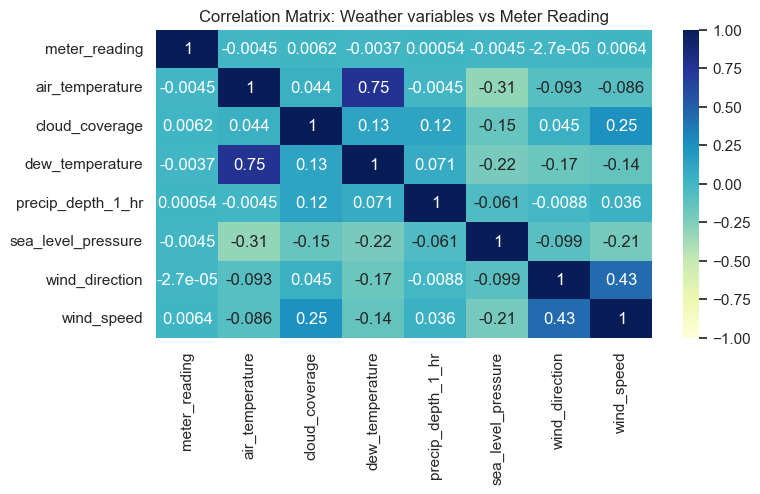

In [30]:
# Looking at correlation weather variables against meter reading

# Subset to get only the columns I want to visualise
subset_df = temp_df[['meter_reading', 'air_temperature',
                      'cloud_coverage', 'dew_temperature',
                      'precip_depth_1_hr', 'sea_level_pressure',
                      'wind_direction', 'wind_speed']]

# Compute the correlation matrix
corr = subset_df.corr()

#Set Style and DFigure
sns.set_theme(style="white", palette="pastel")
fig, ax = plt.subplots(figsize=(8, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.title('Correlation Matrix: Weather variables vs Meter Reading',
          fontdict={'fontsize':12})

##


#### Quick EDA on site 13

Also, the EDA shows that the largest meter readings correspond to site 13. This is likely responsible for the most influencing outliers and are skewing the data. 

In [33]:
# Stats and % of observations for site 13
site_13 = temp_df.loc[temp_df['site_id'] == 13]

print('\n')
print('Meter Reading Stats for site 13:')
print('\n')
print(round(site_13['meter_reading'].describe(), 2))
print('\n')
site13_pct = round((len(site_13)/len(temp_df)*100), 5)
print('site 13 represents ', site13_pct, ' % of dataset size (in rows)')
print('\n')



Meter Reading Stats for site 13:


count     2370344.00
mean        15572.84
std        447157.75
min             1.00
25%            49.42
50%           163.22
75%           710.93
max      21904700.00
Name: meter_reading, dtype: float64


site 13 represents  13.16718  % of dataset size (in rows)




In [34]:
# Check the IQR for site 13's meter reading
from scipy.stats import iqr
site13_iqr = iqr(site_13['meter_reading'])
print('\n')
print("Consumption's IQR: ", site13_iqr)

# I'll also get both Q1 and Q3 for site 13
Q1_S13 = site_13['meter_reading'].quantile(0.25)
Q3_S13 = site_13['meter_reading'].quantile(0.75)



Consumption's IQR:  661.5107421875


####

Quick look at the outliers of consumption in `temp_df`: Looks like there are lots of them and, looking at the x-axis range, looks like they might come from site 13...

Text(0.5, 1.0, 'temp_df - meter reading')

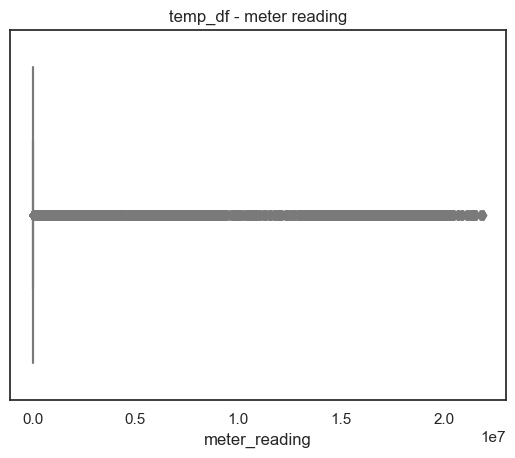

In [35]:
# Boxplot
sns.boxplot(data=temp_df, x="meter_reading").set_title ('temp_df - meter reading')

#####
KDE Plots for energy consumption after log-transformation

In [36]:
# Log10 transformtion for right skewed data
log_trans = np.log10(temp_df['meter_reading'])

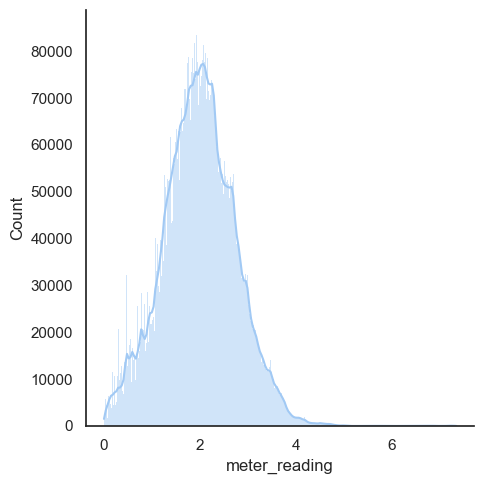

In [37]:
# Plot the log-transformed consumption
sns.displot(log_trans, kde=True)

Looks like the distribution is log-normal...

####

<Axes: xlabel='meter_reading'>

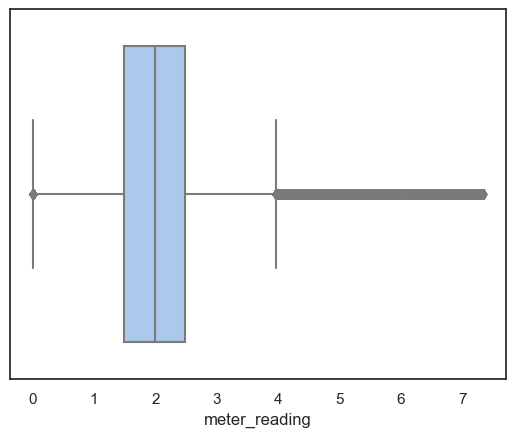

In [38]:
# Check boxplot for the transformed data
sns.boxplot(x=log_trans, orient='h')

Looks like there are still outliers in `meter_reading` after the log transformation, but the distribution looks more symmetric.

##

Box plot for meter readings in site 13

In [39]:
# Subset for site 13 data
meter_reading_site13 = temp_df.loc[temp_df['site_id'] == 13, temp_df.columns[0:6]]
meter_reading_site13.tail(3)

,meter,timestamp,meter_reading,site_id,primary_use,square_feet
20215562,2,2016-12-31 23:00:00,5421.879883,13,Public services,381221
20215563,0,2016-12-31 23:00:00,8.000000,13,Office,29062
20215564,0,2016-12-31 23:00:00,338.122009,13,Lodging/residential,187174


Text(0.5, 1.0, 'meter reading distribution for Site 13')

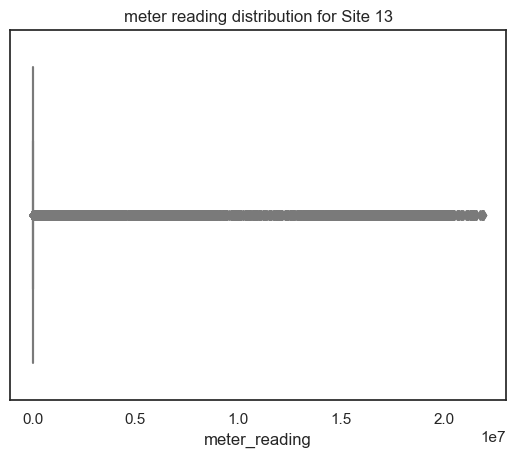

In [40]:
# Meter reading boxplot - site 13
sns.boxplot(data=meter_reading_site13,
            x="meter_reading").set_title('meter reading distribution for Site 13')

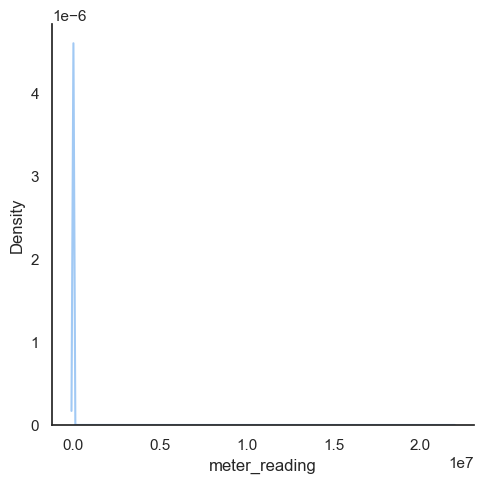

In [41]:
# Distribution of meter reading in site 13
sns.displot(data=meter_reading_site13,
            x="meter_reading",
            kind='kde')

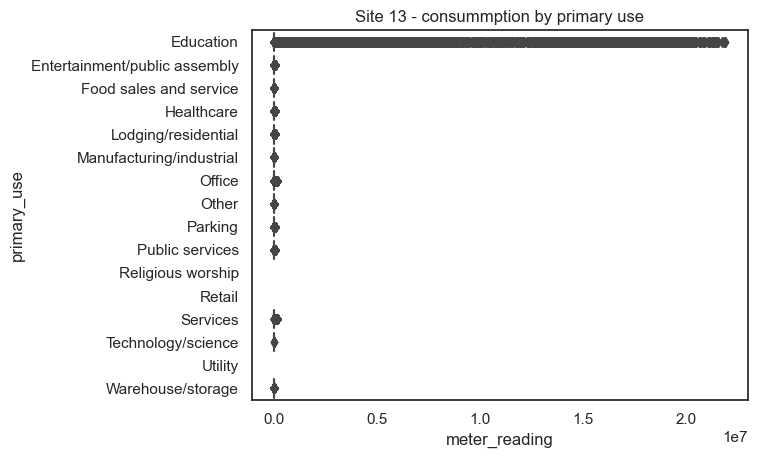

In [42]:
# Boxplot for site 13 energy comsumption by primary use
sns.boxplot(data=meter_reading_site13,
            x="meter_reading",
            y="primary_use").set_title('Site 13 - consummption by primary use')
plt.show()

In [43]:
# Size and % for each of primary use in site_13

# Get size and %
s13_size_by_primary_use = site_13.groupby('primary_use').size()
s13_pct_by_primary_use = site_13.groupby('primary_use').size()/len(site_13)*100

# Concatenating
s13_size_and_pct = pd.concat([s13_size_by_primary_use, s13_pct_by_primary_use], axis=1)
s13_size_and_pct

,0,1
primary_use,,
Education,446573,18.840008
Entertainment/public assembly,109321,4.612031
Food sales and service,17568,0.741158
Healthcare,57073,2.407794
Lodging/residential,164251,6.929416
Manufacturing/industrial,69365,2.926368
Office,1190599,50.228954
Other,34957,1.474765
Parking,87487,3.690899


Maybe removing the rows Education might help even out teh data, since they are just too huge

###

In [44]:
# Subset for site 13 data
meter_reading_site13_2 = temp_df.loc[(temp_df['site_id'] == 13) & (temp_df['primary_use'] != 'Education'), temp_df.columns[0:6]]

print(meter_reading_site13_2['primary_use'].unique())

['Office', 'Lodging/residential', 'Entertainment/public assembly', 'Manufacturing/industrial', 'Parking', ..., 'Food sales and service', 'Services', 'Warehouse/storage', 'Healthcare', 'Technology/science']
Length: 12
Categories (16, object): ['Education', 'Entertainment/public assembly', 'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science', 'Utility', 'Warehouse/storage']


Text(0.5, 1.0, 'meter reading distribution for Site 13')

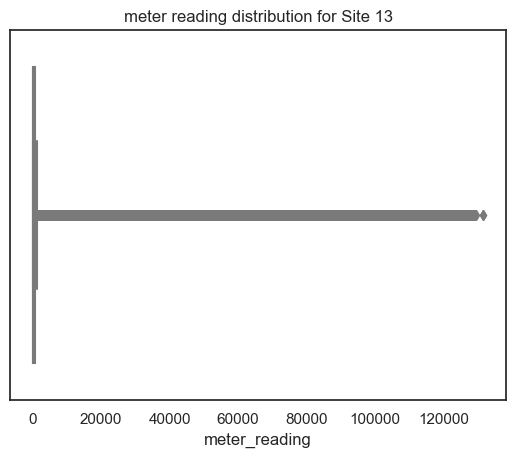

In [45]:
# Looking at the distributions again, for site 13

# Meter reading boxplot - site 13
sns.boxplot(data=meter_reading_site13_2,
            x="meter_reading").set_title('meter reading distribution for Site 13')

Looks like removing Education didn't help, so we might have to remove size 13 altogether.

###
Before removing site 13, check its IQR and its size

In [46]:
# Find number of rows where consumption for site 13 is outside site 13's IQR
iqr_reading_building2=site_13.loc[~((site_13['meter_reading'] < (Q1_S13 - 1.5 * site13_iqr)) |(site_13['meter_reading'] > (Q3_S13 + 1.5 * site13_iqr)))]
pct_of_tempdf = len(iqr_reading_building2)/len(temp_df)*100

#~((temp_df['meter_reading'] < (Q1 - 1.5 * IQR)) |(temp_df['meter_reading'] > (Q3 + 1.5 * IQR)))

print('\n')
print('No. of rows where consumption for site 13 is outside its IQR:', len(iqr_reading_building2), 'rows')
print('As a % of whole training set:', round(pct_of_tempdf), '%')
print('As a % of site 13 subset:', round(len(iqr_reading_building2)/len(site_13)*100, 2), '%')
print('\n') 



No. of rows where consumption for site 13 is outside its IQR: 2049144 rows
As a % of whole training set: 11 %
As a % of site 13 subset: 86.45 %




In [47]:
# Drop rows for site_13 where consumption is outside its IQR, to see how the data for this site looks like
site_13_2 = site_13.loc[~((site_13['meter_reading'] < (Q1_S13 - 1.5 * site13_iqr)) |(site_13['meter_reading'] > (Q3_S13 + 1.5 * site13_iqr)))]

In [48]:
# Check descriptive stats for site 13 again 
print('\n')
print('Meter Reading Stats for site 13 after dropping rows based on site 13s IQR:')
print('\n')
print(round(site_13_2['meter_reading'].describe(), 2)) # Round to display just 2 decimal places



Meter Reading Stats for site 13 after dropping rows based on site 13s IQR:


count    2049144.00
mean         282.29
std          370.10
min            1.00
25%           40.44
50%          121.94
75%          362.57
max         1703.19
Name: meter_reading, dtype: float64


In [49]:
# Check descriptive stats again for temp_df['meter_reading'] in here (so as to not scroll all teh way up again)
print(round(temp_df['meter_reading'].describe(), 2))

count    18001908.00
mean         2369.43
std        162384.39
min             1.00
25%            31.10
50%            97.00
75%           301.21
max      21904700.00
Name: meter_reading, dtype: float64


#####

### Looking at Rows per site

In [50]:
# number of rows for each average consumtion per site (after )
avg_cons = temp_df.groupby('site_id')['meter_reading']\
                  .agg(['mean', 'size'])\
                  .sort_values('size', ascending=False)

avg_cons.reset_index(inplace=True)

# As a percentage of the whole dataset
avg_cons['%_size'] = round(avg_cons['size']/len(temp_df)*100, 2)
avg_cons

,site_id,mean,size,%_size
0,9,283.623169,2485144,13.80
1,13,15572.834961,2370344,13.17
2,3,128.065536,2330259,12.94
3,2,206.624573,2250604,12.50
4,14,758.255554,2177312,12.09
5,15,319.895111,1711108,9.51
6,5,32.762852,746626,4.15
7,0,630.218262,708548,3.94
8,4,193.616287,698340,3.88
9,6,1231.616943,537506,2.99


Note that site_13 represents 13.04% of the whole training data

In [51]:
# Check count of rows is correct and matches total
print('Sum of size: ', avg_cons['size'].sum())
print('Length of temp_df: ', len(temp_df))

Sum of size:  18001908
Length of temp_df:  18001908


####

#### Removing rows for sites
>I will remove the rows for site 13 though, based on teh quick EDA above, given its large variance and size in comparison with all other sites.
> EDA also shows that both the hourly temperature and monthly comsumption profiles per site show irregular patterns for sites 8, 6 and 10, so these sites will be removed/dropped.

In [52]:
# Remove site 13
temp_df = temp_df.loc[~temp_df['site_id'].isin([13, 10, 8 ,6])]

In [53]:
# Check
temp_df['site_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  7, 11, 12, 14, 15,  9], dtype=int8)

In [54]:
# Apply Log10 Transformation for right skewed distribution:
temp_df['meter_reading'] = np.log10(temp_df['meter_reading'])

In [55]:
temp_df['meter_reading'].describe()

count    1.428485e+07
mean     1.962458e+00
std      7.189780e-01
min      0.000000e+00
25%      1.491362e+00
50%      1.974972e+00
75%      2.447546e+00
max      5.477069e+00
Name: meter_reading, dtype: float64

> Send `temp_df` to `.csv`

#####

### Dataset to `.csv` to be used in pre-processing 

In [ ]:
temp_df.to_csv('temp_df.csv')

In [ ]:
# Cloud coverage is found to be an influecial feature, however it has a large number of 
# missing values (42%), so I'll drop this feature before proceding. 

# Drop cloud_coverage feature from train set
x_train = x_train.drop(columns=['cloud_coverage', 'precip_depth_1_hr'])
#x_train = x_train.loc[:, x_train.columns != ['cloud_coverage', 'precip_depth_1_hr']]

x_train.info()

Rows reduced from 15,621,850 down to 10,935,295

In [ ]:
# Drop cloud_coverage feature from test set
x_test = x_test.drop(columns=['cloud_coverage', 'precip_depth_1_hr'])
x_test.info()